In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import re
from functools import reduce
sns.set(style="darkgrid")

warnings.filterwarnings("ignore")

pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set()

In [2]:
df = pd.read_csv("training.csv")

In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
df.shape

(95662, 16)

In [5]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [6]:
df.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [7]:
df.FraudResult.mean()

0.00201752001839811

In [8]:
1 - df.FraudResult.mean()

0.9979824799816019

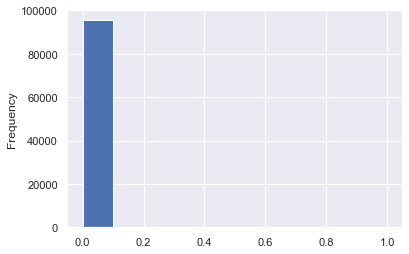

In [9]:
df.FraudResult.plot(kind = "hist")

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [12]:
df.CountryCode.value_counts()

256    95662
Name: CountryCode, dtype: int64

In [13]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [14]:
# WE'll drop TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode'. 
### They are all identification columns and had a single unique value

In [15]:
# df.ProviderId.value_counts().plot(kind = "bar", color = 'r')

In [16]:
df.ProviderId.value_counts()

ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: ProviderId, dtype: int64

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df.ProviderId)
plt.xticks(rotation=45)
plt.show(

SyntaxError: unexpected EOF while parsing (<ipython-input-17-93ce60f2acc9>, line 4)

In [18]:
df.ProductId.value_counts()

ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: ProductId, dtype: int64

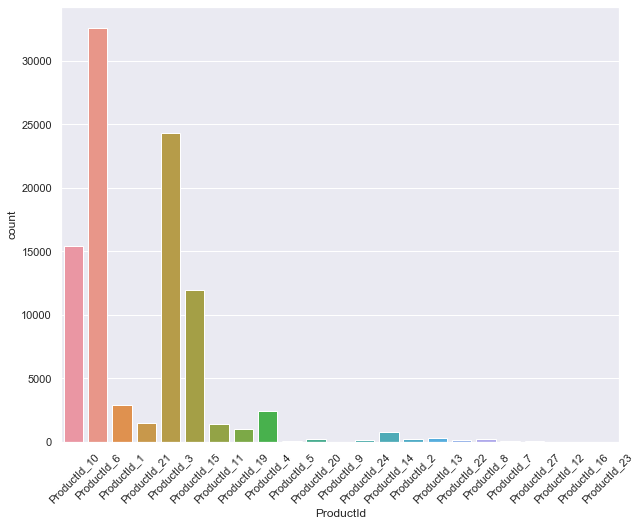

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(df.ProductId)
plt.xticks(rotation = 45)
plt.show()

In [20]:
df.ProductCategory.value_counts()

financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: ProductCategory, dtype: int64

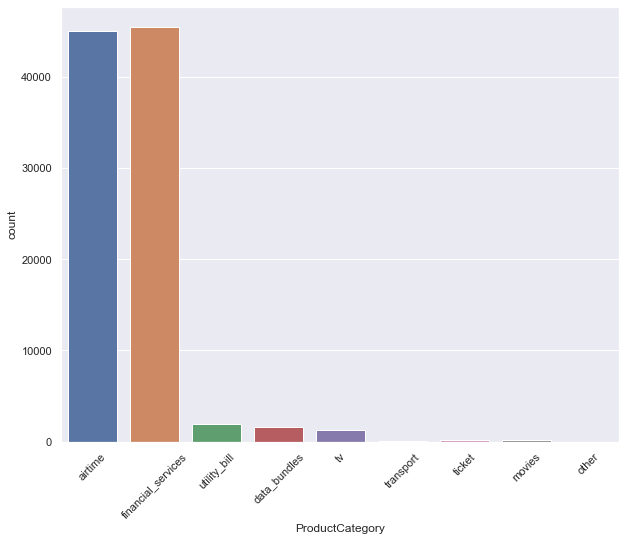

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(df.ProductCategory)
plt.xticks(rotation = '45')
plt.show()

In [22]:
df.ChannelId.value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: ChannelId, dtype: int64

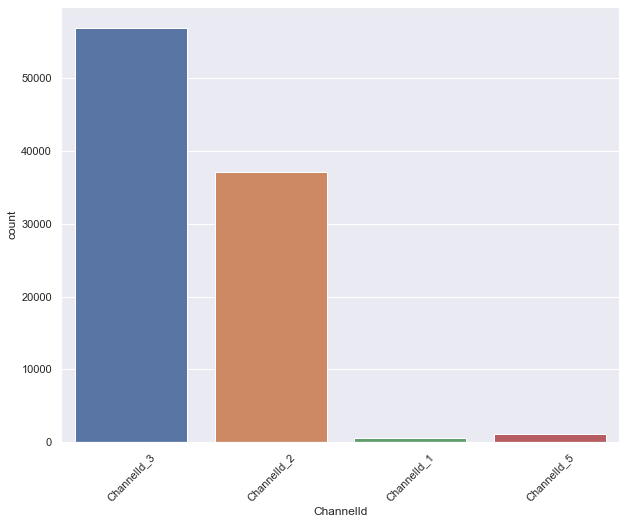

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(df.ChannelId)
plt.xticks(rotation = "45")
plt.show()

In [24]:
df.PricingStrategy.value_counts()

2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64

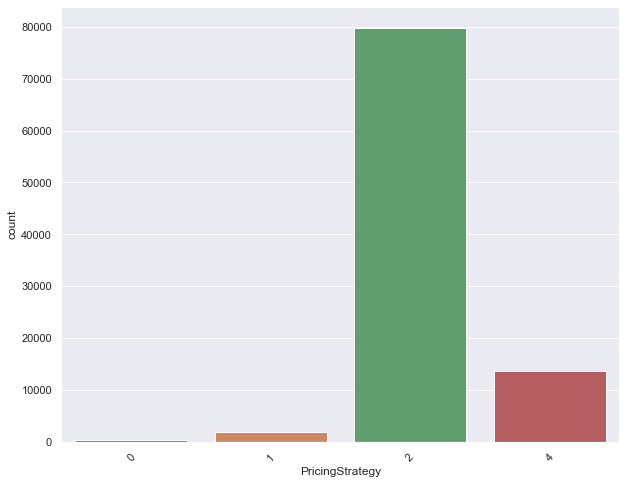

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df.PricingStrategy)
plt.xticks(rotation = "45")
plt.show()

In [26]:
#### Covert the Amount into dummy (Credit and Debit Values). Break the Quintile into 5 equal sizes

In [27]:
df["credit_debit_flag"] =  df.Amount.apply(lambda x: "credit" if x < 0 else "debit")

In [28]:
df["value_quintile"] = pd.qcut(df.Value, q=5, labels=[1,2,3,4,5])


In [29]:
pd.qcut(df.Value, q=5).value_counts().sort_index()

(1.999, 100.0]         21076
(100.0, 1000.0]        30772
(1000.0, 2000.0]        9468
(2000.0, 8000.0]       15223
(8000.0, 9880000.0]    19123
Name: Value, dtype: int64

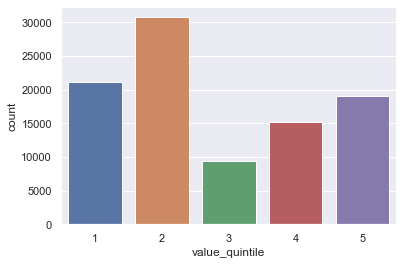

In [30]:
sns.countplot(df.value_quintile)

In [31]:
#### Else, we can do log transformation
# df.Value = np.log1p(df.Value)

In [32]:
df.TransactionStartTime = pd.to_datetime(df.TransactionStartTime)

In [33]:
df["year"] = df.TransactionStartTime.dt.year
df["month"] = df.TransactionStartTime.dt.month
df["day"] = df.TransactionStartTime.dt.day
df["week"] = df.TransactionStartTime.dt.week

In [34]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,credit_debit_flag,value_quintile,year,month,day,week
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,debit,2,2018,11,15,46
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,credit,1,2018,11,15,46
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,debit,2,2018,11,15,46
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,debit,5,2018,11,15,46
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,credit,2,2018,11,15,46


In [35]:
df.dtypes

TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
credit_debit_flag                    object
value_quintile                     category
year                                  int64
month                                 int64
day                                   int64
week                                  int64
dtype: object

In [36]:
df.dtypes

TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
credit_debit_flag                    object
value_quintile                     category
year                                  int64
month                                 int64
day                                   int64
week                                  int64
dtype: object

In [37]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,credit_debit_flag,value_quintile,year,month,day,week
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,debit,2,2018,11,15,46
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,credit,1,2018,11,15,46
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,debit,2,2018,11,15,46
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,debit,5,2018,11,15,46
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,credit,2,2018,11,15,46


In [38]:
df = df.drop(["TransactionId", "BatchId", "AccountId", "SubscriptionId", "CustomerId", "CurrencyCode", "CountryCode", "Amount", "TransactionStartTime", "Value"], axis = 1)

In [39]:
df.year.apply(lambda x: "2018" if x is 2018 else "2019")

0        2019
1        2019
2        2019
3        2019
4        2019
5        2019
6        2019
7        2019
8        2019
9        2019
10       2019
11       2019
12       2019
13       2019
14       2019
15       2019
16       2019
17       2019
18       2019
19       2019
20       2019
21       2019
22       2019
23       2019
24       2019
25       2019
26       2019
27       2019
28       2019
29       2019
30       2019
31       2019
32       2019
33       2019
34       2019
35       2019
36       2019
37       2019
38       2019
39       2019
40       2019
41       2019
42       2019
43       2019
44       2019
45       2019
46       2019
47       2019
48       2019
49       2019
50       2019
51       2019
52       2019
53       2019
54       2019
55       2019
56       2019
57       2019
58       2019
59       2019
60       2019
61       2019
62       2019
63       2019
64       2019
65       2019
66       2019
67       2019
68       2019
69       2019
70       2019
71    

In [40]:
df.year = df.year.astype("object")
df.month = df.month.astype("object")
df.day = df.day.astype("object")
df.week = df.week.astype("object")
df.PricingStrategy = df.PricingStrategy.astype("object")




In [41]:
df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult,credit_debit_flag,value_quintile,year,month,day,week
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,2,0,debit,2,2018,11,15,46
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,0,credit,1,2018,11,15,46
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,2,0,debit,2,2018,11,15,46
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2,0,debit,5,2018,11,15,46
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,0,credit,2,2018,11,15,46


In [42]:
df = pd.get_dummies(df)

In [43]:
df.shape

(95662, 105)

In [44]:
def find_stability(feature_list):
    positive = 0
    negative = 0
    for i in feature_list:
        
        if i > 0:
            positive += 1
        else:
            negative += 1
    
    abs_corr =  [abs(element) for element in feature_list] 
    
    return (max(positive, negative),(sum(abs_corr)/len(abs_corr)))

In [51]:
# """

# Find stability
# 	- Take the training sample, split in 4 periods in equal size of observation sorted by time periods.
# 	- Period 1,2,3,4.
# 	- 4 random folds...mixing time periods.
# 	- Measure the correlation of each variable against the target variable... within each samples (8)
# 	- Table where each row it's the variables and the column is the sample
# 	- Calculated percentage of samples that go in the same direction 6 out 8 are in -ve 
# 	- Top variables are 100% in the same direction

# Measure the absolute value of the correlation
# Take the average of the 8 values , absolute value of the average...then take the absolute to determine how strong it is...the higher the absolute average the better.
# How to pick the best? 

# """

# def find_stable_features(data, splits=4, direction_count=8, avg_corr=0.02):
    
#     df_split_ordered = np.array_split(data, splits)
#     df_split = np.array_split(data, splits)

#     combined = df_split_ordered + df_split

#     corr_df = pd.DataFrame()
    
#     for index, df in enumerate(combined):
#         corr_df[f'split_{index}'] = df.corr()["FraudResult"]

#     direction = corr_df.apply(lambda x : find_stability(x),axis=1)

#     corr_df["direction"] = direction.apply(lambda x : x[0])
#     corr_df["average_corr"] = direction.apply(lambda x : x[1])

#     set_direction = set(corr_df[corr_df["direction"] >= direction_count].index)
#     set_average_corr = set(corr_df[corr_df["average_corr"] >= avg_corr].index)

#     stable_features = list(set_direction.intersection(set_average_corr))
    
#     return stable_features

In [52]:
# model_1_variable_corr = dict(df.corr()["FraudResult"])

# model_1_stable_features = find_stable_features(df, direction_count=5)
# print (len(model_1_stable_features))

# new_dict = {x: v for x, v in model_1_variable_corr.items() if x in model_1_stable_features}
# print(new_dict)

In [53]:
df.head()

,FraudResult,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_1,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,credit_debit_flag_credit,credit_debit_flag_debit,value_quintile_1,value_quintile_2,value_quintile_3,value_quintile_4,value_quintile_5,year_2018,year_2019,month_1,month_2,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X = df.drop("FraudResult", axis = 1)
y = df.FraudResult

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [118]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66963, 104) (28699, 104) (66963,) (28699,)


In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr = LogisticRegression(C = 0.01, solver="liblinear", random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [121]:
prediction = lr.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score, f1_score

In [123]:
accuracy_score(y_test, prediction)

0.9980487124986933

In [124]:
y_test.value_counts()

0    28643
1       56
Name: FraudResult, dtype: int64

In [152]:
pd.DataFrame(prediction).reset_index().rename(columns = {0: "prediction"}).prediction.value_counts()

0    38265
Name: prediction, dtype: int64

In [153]:
from sklearn.metrics import roc_auc_score

In [154]:
y_prob = lr.predict_proba(X_test)[::, 1]

In [155]:
roc_auc_score(y_test, y_prob)

0.952472716280238

In [156]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_to_object_array' from 'sklearn.utils' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py)

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

In [46]:
df.head()

,FraudResult,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_1,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,credit_debit_flag_credit,credit_debit_flag_debit,value_quintile_1,value_quintile_2,value_quintile_3,value_quintile_4,value_quintile_5,year_2018,year_2019,month_1,month_2,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
df = df.groupby('ProductCategory').FraudResult.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['ProductCategory'],
        y=df_plot['FraudResult'],
    )
]

NameError: name 'go' is not defined

In [ ]:
df.head()

In [ ]:
df.TransactionStartTime = pd.to_datetime(df.TransactionStartTime)

In [ ]:
#making a new column month
df['day'] = df['TransactionStartTime'].dt.day
 
#making a new column month
df['month'] = df['TransactionStartTime'].dt.month

# making a new column year
df['year'] = df['TransactionStartTime'].dt.year

# making a new column week
df['week'] = df['TransactionStartTime'].dt.week

In [ ]:
df.tail()

In [ ]:
sns.countplot(df.month)

In [ ]:

df['Time_diff'] = df['TransactionStartTime'].diff().dt.total_seconds()

In [ ]:
df.head()

In [ ]:
df.info()

In [40]:
df[["Amount", "Va"]]

KeyError: "None of [Index(['Amount', 'Va'], dtype='object')] are in the [columns]"

In [41]:
#### Ideas
Extract year, month and day from transaction_start_time. Create dummy variables for all of them
#### For each of the categorical data. Please get their dummies
### Split the dataset given into train and test (preferabbly, 70:30)



SyntaxError: invalid syntax (<ipython-input-41-e4e9ddc8dcce>, line 2)